# Esplorasi Data

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np # numpy
import pandas as pd # pandas
import matplotlib.pyplot as plt # matplotlib

In [2]:
df = pd.read_csv('Praktek/Day 15/csv/gaji-karyawan/salary_data.csv')

### Melihat Shape

In [3]:
df.shape

(30, 2)

### melihat 5 baris teratas dan 5 baris terbawah

In [4]:
df.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [5]:
df.tail()

YearsExperience  Salary
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872

### melihat informasi dan deskripsi dari data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


###### dari info di atas bisa di lihat kalao dari column YearsExperience dan Salary semua data terisi 
###### Hal tersebut di tandai oleh non null  pada info

In [7]:
df.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

## Training Dataset

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,1:]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [10]:
regressor = LinearRegression()

In [11]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction

In [12]:
y_pred = regressor.predict([[10]])

print('Gaji tertinggi yang bisa diberikan adalah $', int(y_pred))

Gaji tertinggi yang bisa diberikan adalah $ 120275


In [13]:
# Prediksi gaji berdasarkan x_test
y_pred = regressor.predict(x_test)

# membuat dataframe untuk y_test dan y_pred
df1 = pd.DataFrame(y_test).reset_index(drop=True)
df2 = pd.DataFrame(y_pred, columns=['Predicted Salary']).reset_index(drop=True).astype(int)

df1.join(df2)

Salary  Predicted Salary
0   37731             40835
1  122391            123079
2   57081             65134
3   63218             63265
4  116969            115602
5  109431            108125
6  112635            116537
7   55794             64199
8   83088             76349
9  101302            100649

## Akurasi data

In [14]:
# masukan model yang menggunakan training data ke dalam variabel
model = regressor.fit(x_train, y_train)

# tampilkan nilai score dari model yang menggunakan test data
print('Score dari model adalah', model.score(x_test,y_test))

Score dari model adalah 0.9749154407708353


## Visualisasi Data


#### Scatter plot gaji karyawan

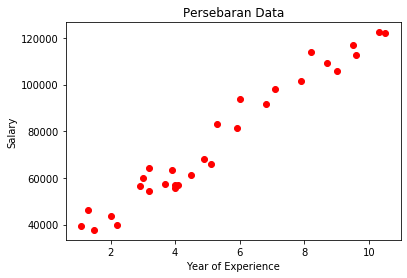

In [15]:

plt.scatter(x, y, color='red')
plt.title('Persebaran Data')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

### Scatter plot hasil prediksi regresi linier

#### Menggunakan training data

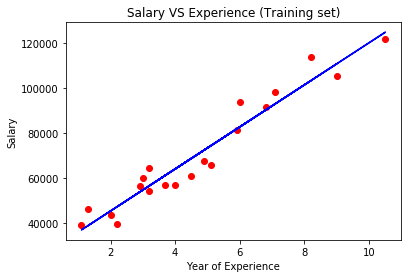

In [16]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

#### Menggunakan test data

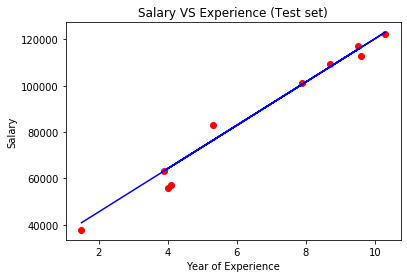

In [20]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, regressor.predict(x_test), color='blue')
plt.title('Salary VS Experience (Test set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

#### Menggunakan Data Asli

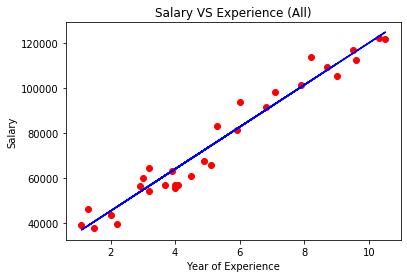

In [21]:


plt.scatter(x, y, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (All)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

## Scatter Plot Prediksi Gaji dengan pengalaman 10 Tahun


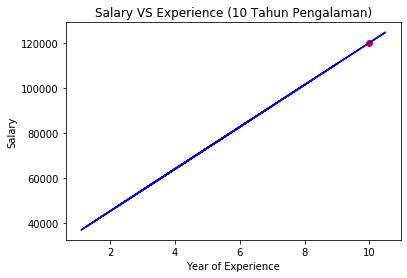

In [23]:
y_predi = regressor.predict([[10]])


plt.scatter(10, y_predi, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (10 Tahun Pengalaman)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()